# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [42]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
weather = mars_soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_rows = []
# Loop through the scraped data to create a list of rows
for row in weather.find_all('tr'):
    row_mars = []
    
    #iterate through columns
    for cell in row.find_all('td'):
        row_mars.append(cell.get_text(strip=True))
    #append
    mars_rows.append(row_mars)


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(mars_rows[1:], columns=column_names)
df.reset_index(drop=True, inplace=True)

In [10]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
mars_types = df.dtypes


In [13]:
# Change data types for data analysis
# convert 'id', 'sol', 'ls', and 'month' to interger
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

#convert 'terrestrial_date' into datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

#convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
mars_types = df.dtypes
mars_types

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
mars_month = df['month'].nunique()
print("Number of months on Mars:", mars_month)

Number of months on Mars: 12


In [20]:
# 2. How many Martian days' worth of data are there?
mars_days = df['sol'].nunique()
print("Number of Martian days:", mars_days)

Number of Martian days: 1867


In [22]:
# 3. What is the average low temperature by month?
avg_mars_temp = df.groupby('month')['min_temp'].mean()
print("Average low temp by month:",)
print(avg_mars_temp)

Average low temp by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


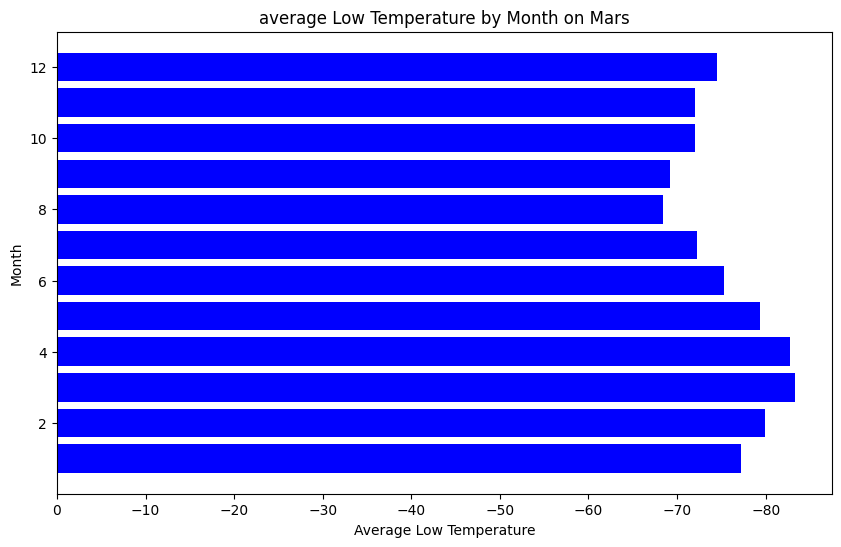

In [34]:
# Plot the average temperature by month
sorted_data = avg_mars_temp.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(sorted_data.index, sorted_data, color='blue')
plt.title('average Low Temperature by Month on Mars')
plt.xlabel('Average Low Temperature')
plt.ylabel('Month')
plt.gca().invert_xaxis()
plt.show()


In [46]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = df[df['min_temp'] == df['min_temp'].min()]['month'].values[0]
hottest_month = df[df['min_temp'] == df['min_temp'].max()]['month'].values[0]

#print
print("Coldest Month:", coldest_month)
print("Hottest Month:", hottest_month)

Coldest Month: 3
Hottest Month: 1


In [36]:
# 4. Average pressure by Martian month
avg_pressure_month = df.groupby('month')['pressure'].mean()

#print
print("Average Pressure by Martian Month")
print(avg_pressure_month)

Average Pressure by Martian Month
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


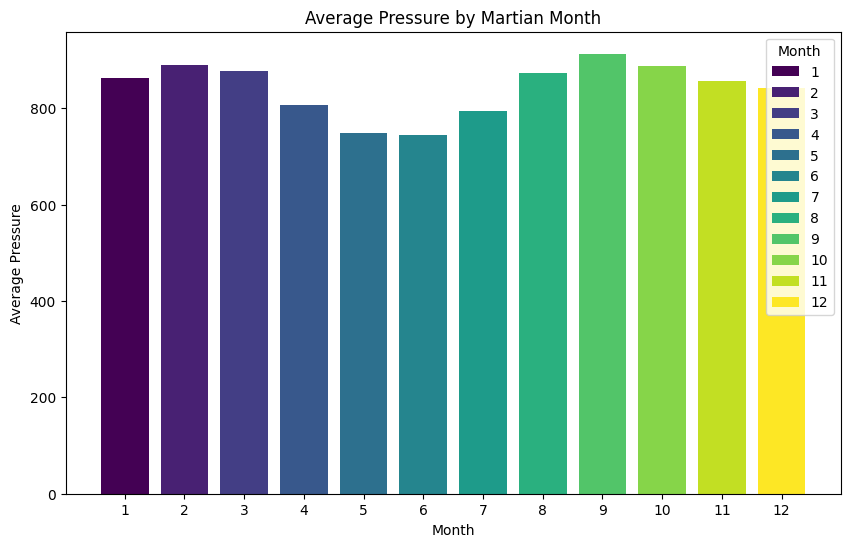

In [44]:
# Plot the average pressure by month
#create unique list of colors per month
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_pressure_month)))
#create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_pressure_month.index, avg_pressure_month, color=colors)
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(avg_pressure_month.index, rotation=0)

#customize color legend
color_labels = [str(month) for month in avg_pressure_month.index]
plt.legend(bars, color_labels, title='Month', loc='upper right')

plt.show()


In [45]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# define duration of Martian day (in Earth seconds)
mars_second = 24 * 3600 + 39 * 90 + 25

#define number of sols in Martian year
year_sol = 687

# calculate number of terrestrial (Earth) days in Martian year
earthd_to_marsy = mars_second * year_sol / (24 * 3600)

#print
print("There are {:.2f} terrestrial (Earth) days in a Martian year.".format(earthd_to_marsy))

There are 715.11 terrestrial (Earth) days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the data to a CSV
#specify file path
#csv_file_path = r"C:\Users\zombi\Web Scrape Challenge\Starter_Code"
custom_csv_file_name = "mars_Weather.csv"
#write the dataframe to a csv
df.to_csv(custom_csv_file_name, index=False)



#confirm that the csv file has been written
print("Data has been written to", csv_file_path)

Data has been written to C:\Users\zombi\Web Scrape Challenge\Starter_Code


In [59]:
browser.quit()